In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
def Calculate_Annualized_Volatility(data, shift_period):
    df = data.copy(deep=True)
    log_ret = np.log(df['Close']) - np.log(df['Close'].shift(shift_period))
    log_ret.dropna(inplace=True)
    
    annualized_vol = np.sqrt(np.var(log_ret)) * np.sqrt(252 / shift_period)
    return annualized_vol

In [3]:
def Calculate_Stats(data, shift_period):
    df = data.copy(deep=True)
    log_ret = np.log(df['Close']) - np.log(df['Close'].shift(shift_period))
    log_ret.dropna(inplace=True)
    
    mean = log_ret.mean() * (252/shift_period)
    median = log_ret.median() * (252/shift_period)
    quantile_25 = np.quantile(log_ret, 0.25) * (252/shift_period)
    quantile_75 = np.quantile(log_ret, 0.75) * (252/shift_period)
    
    return mean, median, quantile_25, quantile_75

In [4]:
spy = yf.Ticker('SPY')

## Annualized Volatility with Different Sampling Frequency (Daily Data)

In [5]:
df = spy.history(start='2000-01-01', end='2007-12-31', interval='1d')

In [6]:
AnnualizedVol = []
shift_period = list(range(1,31))
for i in shift_period:
    vol = Calculate_Annualized_Volatility(df, i)
    AnnualizedVol.append(vol)

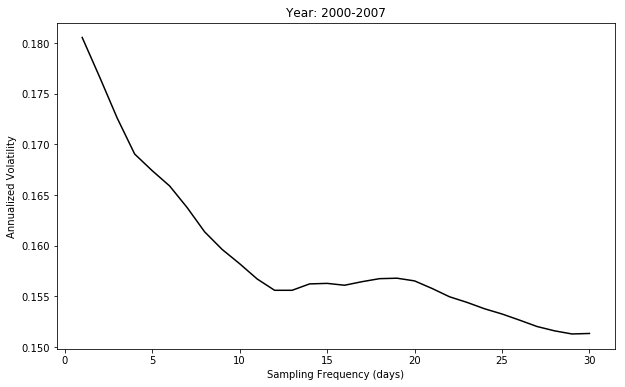

In [7]:
plt.figure(figsize=(10, 6))
_ = plt.plot(shift_period, AnnualizedVol, 'k')
_ = plt.xlabel('Sampling Frequency (days)')
_ = plt.ylabel('Annualized Volatility')
_ = plt.title('Year: 2000-2007')

In [8]:
df = spy.history(start='2007-01-01', end='2014-12-31', interval='1d')

In [9]:
AnnualizedVol = []
shift_period = list(range(1,31))
for i in shift_period:
    vol = Calculate_Annualized_Volatility(df, i)
    AnnualizedVol.append(vol)

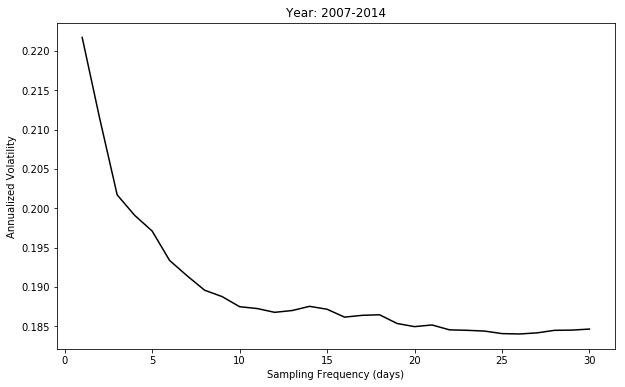

In [10]:
plt.figure(figsize=(10, 6))
_ = plt.plot(shift_period, AnnualizedVol, 'k')
_ = plt.xlabel('Sampling Frequency (days)')
_ = plt.ylabel('Annualized Volatility')
_ = plt.title('Year: 2007-2014')

## compute the mean, the median, the 25% and 75% quantile (Daily Data)

In [11]:
df = spy.history(start='2007-01-01', end='2014-12-31', interval='1d')

In [12]:
means, medians, quantile_25s, quantile_75s = [], [], [], []
for i in shift_period:
    mean, median, quantile_25, quantile_75 = Calculate_Stats(df, i)
    means.append(mean)
    medians.append(median)
    quantile_25s.append(quantile_25)
    quantile_75s.append(quantile_75)

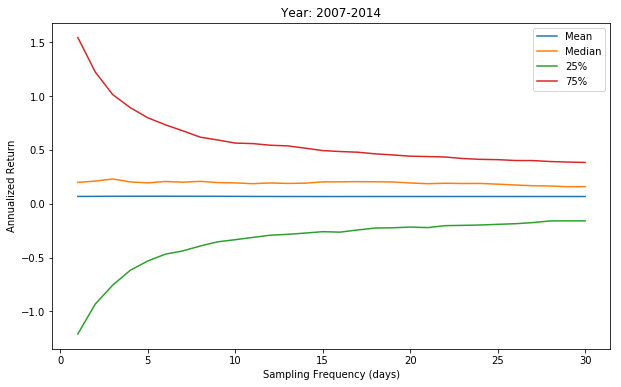

In [13]:
plt.figure(figsize=(10, 6))
_ = plt.plot(shift_period, means, label='Mean')
_ = plt.plot(shift_period, medians, label='Median')
_ = plt.plot(shift_period, quantile_25s, label='25%')
_ = plt.plot(shift_period, quantile_75s, label='75%')
_ = plt.xlabel('Sampling Frequency (days)')
_ = plt.ylabel('Annualized Return')
_ = plt.title('Year: 2007-2014')
_ = plt.legend()

In [14]:
def Calculate_Annualized_Volatility(data, shift_period):
    df = data.copy(deep=True)
    log_ret = np.log(df['Close']) - np.log(df['Close'].shift(shift_period))
    log_ret.dropna(inplace=True)
    
    annualized_vol = np.sqrt(np.var(log_ret)) * np.sqrt(252 / shift_period * 6.5*60)
    return annualized_vol

In [15]:
def Calculate_Stats(data, shift_period):
    df = data.copy(deep=True)
    log_ret = np.log(df['Close']) - np.log(df['Close'].shift(shift_period))
    log_ret.dropna(inplace=True)
    
    mean = log_ret.mean() * (252/shift_period) * (6.5*60)
    median = log_ret.median() * (252/shift_period) * (6.5*60)
    quantile_25 = np.quantile(log_ret, 0.25) * (252/shift_period) * (6.5*60)
    quantile_75 = np.quantile(log_ret, 0.75) * (252/shift_period) * (6.5*60)
    
    return mean, median, quantile_25, quantile_75

## Annualized Volatility with Different Sampling Frequency (Intraday Data)

In [16]:
df = spy.history(period='5d', interval='1m')

In [17]:
AnnualizedVol = []
shift_period = list(range(1,121))
for i in shift_period:
    vol = Calculate_Annualized_Volatility(df, i)
    AnnualizedVol.append(vol)

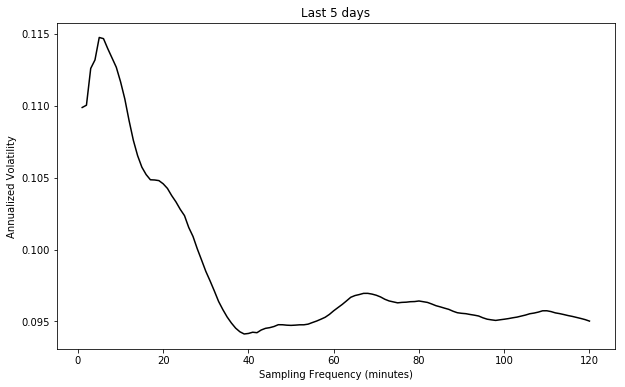

In [18]:
plt.figure(figsize=(10, 6))
_ = plt.plot(shift_period, AnnualizedVol, 'k')
_ = plt.xlabel('Sampling Frequency (minutes)')
_ = plt.ylabel('Annualized Volatility')
_ = plt.title('Last 5 days')

## compute the mean, the median, the 25% and 75% quantile (Intraday Data)

In [19]:
df = spy.history(period='5d', interval='1m')

In [20]:
means, medians, quantile_25s, quantile_75s = [], [], [], []
for i in shift_period:
    mean, median, quantile_25, quantile_75 = Calculate_Stats(df, i)
    means.append(mean)
    medians.append(median)
    quantile_25s.append(quantile_25)
    quantile_75s.append(quantile_75)

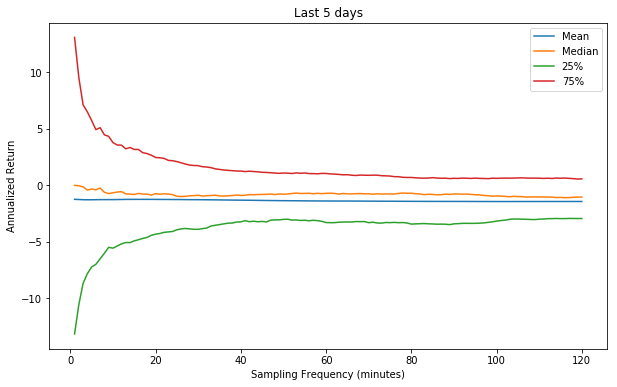

In [21]:
plt.figure(figsize=(10, 6))
_ = plt.plot(shift_period, means, label='Mean')
_ = plt.plot(shift_period, medians, label='Median')
_ = plt.plot(shift_period, quantile_25s, label='25%')
_ = plt.plot(shift_period, quantile_75s, label='75%')
_ = plt.xlabel('Sampling Frequency (minutes)')
_ = plt.ylabel('Annualized Return')
_ = plt.title('Last 5 days')
_ = plt.legend()